# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `NIKHIL SARASWAT`

Roll Number: `20CS10039`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [1]:
import torch
import torch.nn
import random
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader


# Add any other imports here
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn as nn

# Set device to use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
SEED = 42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)


## Getting the data

In [3]:
train_data = datasets.MNIST(
    'data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(
    'data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(
    train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))


50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [4]:
# Model A Definition
class ModelA(nn.Module):
    def __init__(self, input_size=784, hidden_size1=64, hidden_size2=128, num_classes=10):
        super(ModelA, self).__init__()
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc1 = nn.Linear(input_size, hidden_size1)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        return self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))


# Fill in appropriately while maintaining the name of the variable
modelA = ModelA().to(device)


### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [5]:
# Model B Definiton
class ModelB(nn.Module):
    def __init__(self, input_size=784, hidden_size1=64, hidden_size2=128, hidden_size3=256, num_classes=10):
        super(ModelB, self).__init__()
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc1 = nn.Linear(input_size, hidden_size1)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        return self.fc4(self.relu(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))))


# Use the same variable name
modelB = ModelB().to(device)


### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [6]:
# Model C Definition
class ModelC(nn.Module):
    def __init__(self, input_size=784, hidden_size1=64, hidden_size2=128, hidden_size3=256, hidden_size4=512, num_classes=10):
        super(ModelC, self).__init__()
        self.relu = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size4, num_classes)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc1 = nn.Linear(input_size, hidden_size1)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        return self.fc5(self.relu(self.fc4(self.relu(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))))))


# Use the same variable name
modelC = ModelC().to(device)


## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [7]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
# we will change the optimizer later for other models according to their parameters
optimizer = optim.Adam(modelA.parameters(), lr=0.001)


## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [8]:
# Define the hyperparameters (same for all 3 models) here
learning_rate = 0.001
num_epochs = 15


### Model A 



In [9]:
# Training Loop for model A
train_acc_list = []
train_loss_list = []
val_acc_list = []
val_loss_list = []

# set hyperparameters
# set the optimizer for model A
optimizer = optim.Adam(modelA.parameters(), lr=learning_rate)

for epoch in range(num_epochs):  # loop over the dataset multiple times
    train_loss = val_loss = train_acc = val_acc = 0.0

    # train
    modelA.train()
    for _, data in enumerate(train_loader):
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        optimizer.zero_grad()  # zero the parameter gradients
        outputs = modelA(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        loss.backward()  # backward pass
        optimizer.step()  # update weights
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # get the number of correct predictions
        train_acc += (pred == labels).sum().item()
        train_loss += loss.item()  # add the mini-batch training loss

    # validation

    modelA.eval()
    for _, data in enumerate(val_loader):
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        outputs = modelA(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # get the number of correct predictions
        val_acc += (pred == labels).sum().item()
        val_loss += loss.item()  # add the mini-batch training loss

    train_acc = train_acc/len(train_loader.dataset)
    train_acc_list.append(train_acc)
    val_acc = val_acc/len(val_loader.dataset)
    val_acc_list.append(val_acc)
    train_loss = train_loss/len(train_loader)
    train_loss_list.append(train_loss)
    val_loss = val_loss/len(val_loader)
    val_loss_list.append(val_loss)

    #
    print("Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}, Val Loss: {:.3f}, Val Acc: {:.3f}".format(
        epoch+1, train_loss, train_acc, val_loss, val_acc))
    model_Accuracy__model = {'A': val_acc}


Epoch: 1, Train Loss: 0.386, Train Acc: 0.889, Val Loss: 0.225, Val Acc: 0.935
Epoch: 2, Train Loss: 0.172, Train Acc: 0.949, Val Loss: 0.165, Val Acc: 0.950
Epoch: 3, Train Loss: 0.120, Train Acc: 0.964, Val Loss: 0.141, Val Acc: 0.957
Epoch: 4, Train Loss: 0.091, Train Acc: 0.972, Val Loss: 0.120, Val Acc: 0.963
Epoch: 5, Train Loss: 0.072, Train Acc: 0.977, Val Loss: 0.113, Val Acc: 0.966
Epoch: 6, Train Loss: 0.060, Train Acc: 0.981, Val Loss: 0.106, Val Acc: 0.969
Epoch: 7, Train Loss: 0.050, Train Acc: 0.984, Val Loss: 0.112, Val Acc: 0.968
Epoch: 8, Train Loss: 0.042, Train Acc: 0.987, Val Loss: 0.102, Val Acc: 0.971
Epoch: 9, Train Loss: 0.036, Train Acc: 0.989, Val Loss: 0.109, Val Acc: 0.970
Epoch: 10, Train Loss: 0.031, Train Acc: 0.990, Val Loss: 0.112, Val Acc: 0.971
Epoch: 11, Train Loss: 0.027, Train Acc: 0.991, Val Loss: 0.112, Val Acc: 0.970
Epoch: 12, Train Loss: 0.026, Train Acc: 0.991, Val Loss: 0.109, Val Acc: 0.975
Epoch: 13, Train Loss: 0.019, Train Acc: 0.994, V

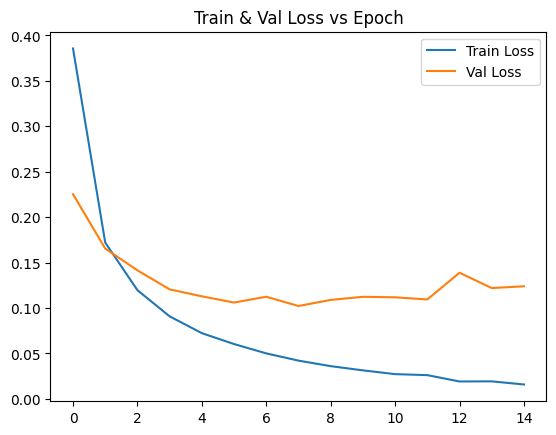

In [10]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Val Loss')
plt.title('Train & Val Loss vs Epoch')
plt.legend()
plt.show()


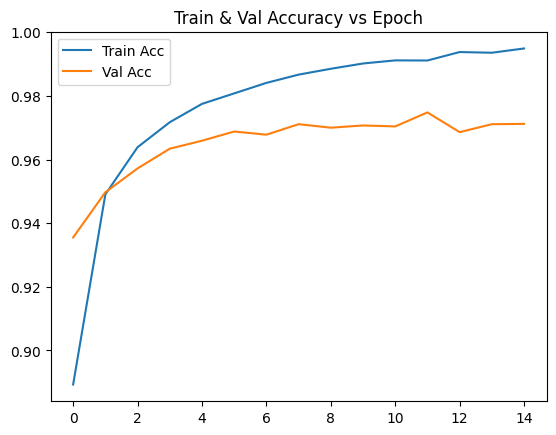

In [11]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A
plt.plot(train_acc_list, label='Train Acc')
plt.plot(val_acc_list, label='Val Acc')
plt.title('Train & Val Accuracy vs Epoch')
plt.legend()
plt.show()


### Model B


In [12]:
# Training Loop for model B
train_acc_list = []
train_loss_list = []
val_acc_list = []
val_loss_list = []

# set the optimizer for model B
optimizer = optim.Adam(modelB.parameters(), lr=learning_rate)

for epoch in range(num_epochs):  # loop over the dataset multiple times
    # Train
    train_loss = val_loss = train_acc = val_acc = 0.0  # set the initial values to 0

    # train
    modelB.train()  # set the model to training mode
    for _, data in enumerate(train_loader):  # loop over the training data
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        optimizer.zero_grad()  # zero the parameter gradients
        outputs = modelB(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        loss.backward()  # backward pass
        optimizer.step()  # update weights
        train_loss += loss.item()  # add the mini-batch training loss
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # get the number of correct predictions
        # add the mini-batch training accuracy
        train_acc += (pred == labels).sum().item()

    # Validation
    modelB.eval()
    for _, data in enumerate(val_loader):  # loop over the validation data
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        outputs = modelB(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        val_loss += loss.item()  # add the mini-batch validation loss
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # add the mini-batch validation accuracy
        val_acc += (pred == labels).sum().item()

    # calculate the average training accuracy
    train_acc = train_acc/len(train_loader.dataset)
    # add the average training accuracy to the list
    train_acc_list.append(train_acc)
    # calculate the average validation accuracy
    val_acc = val_acc/len(val_loader.dataset)
    # add the average validation accuracy to the list
    val_acc_list.append(val_acc)
    # calculate the average training loss
    train_loss = train_loss/len(train_loader)
    # add the average training loss to the list
    train_loss_list.append(train_loss)
    # calculate the average validation loss
    val_loss = val_loss/len(val_loader)
    # add the average validation loss to the list
    val_loss_list.append(val_loss)

    # Print epoch results
    print("Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}, Val Loss: {:.3f}, Val Acc: {:.3f}".format(
        epoch+1, train_loss, train_acc, val_loss, val_acc))
    model_Accuracy__model.update({'B': val_acc})


Epoch: 1, Train Loss: 0.362, Train Acc: 0.889, Val Loss: 0.191, Val Acc: 0.944
Epoch: 2, Train Loss: 0.142, Train Acc: 0.957, Val Loss: 0.142, Val Acc: 0.957
Epoch: 3, Train Loss: 0.103, Train Acc: 0.968, Val Loss: 0.124, Val Acc: 0.961
Epoch: 4, Train Loss: 0.081, Train Acc: 0.975, Val Loss: 0.129, Val Acc: 0.961
Epoch: 5, Train Loss: 0.067, Train Acc: 0.979, Val Loss: 0.122, Val Acc: 0.966
Epoch: 6, Train Loss: 0.055, Train Acc: 0.982, Val Loss: 0.113, Val Acc: 0.969
Epoch: 7, Train Loss: 0.046, Train Acc: 0.985, Val Loss: 0.110, Val Acc: 0.969
Epoch: 8, Train Loss: 0.040, Train Acc: 0.987, Val Loss: 0.107, Val Acc: 0.970
Epoch: 9, Train Loss: 0.037, Train Acc: 0.988, Val Loss: 0.114, Val Acc: 0.969
Epoch: 10, Train Loss: 0.034, Train Acc: 0.989, Val Loss: 0.133, Val Acc: 0.966
Epoch: 11, Train Loss: 0.026, Train Acc: 0.991, Val Loss: 0.120, Val Acc: 0.971
Epoch: 12, Train Loss: 0.025, Train Acc: 0.992, Val Loss: 0.117, Val Acc: 0.973
Epoch: 13, Train Loss: 0.023, Train Acc: 0.992, V

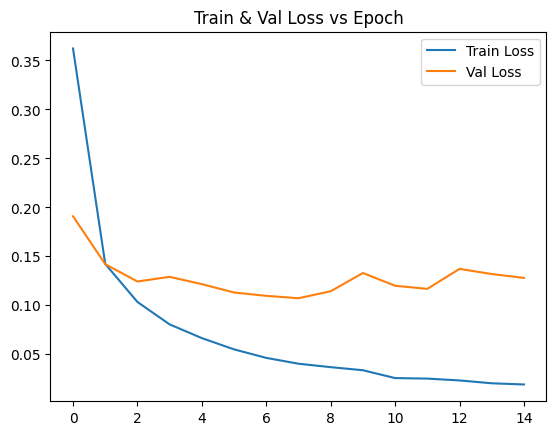

In [13]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Val Loss')
plt.title('Train & Val Loss vs Epoch')
plt.legend()
plt.show()


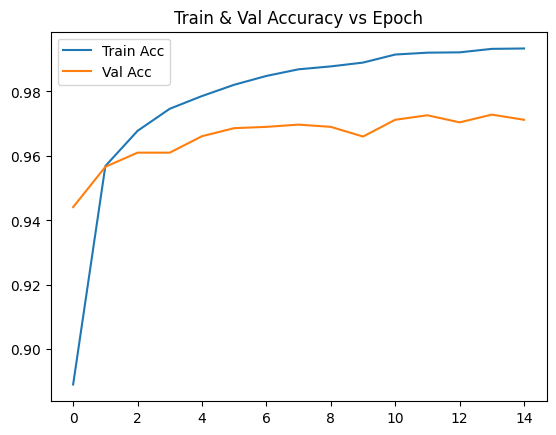

In [14]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
plt.plot(train_acc_list, label='Train Acc')
plt.plot(val_acc_list, label='Val Acc')
plt.title('Train & Val Accuracy vs Epoch')
plt.legend()
plt.show()


### Model C


In [15]:
# Training Loop for model C
train_acc_list = []
train_loss_list = []
val_acc_list = []
val_loss_list = []

# set the optimizer for model C
optimizer = optim.Adam(modelC.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    # Train
    train_loss = val_loss = train_acc = val_acc = 0.0  # set the initial values to 0

    # train
    modelC.train()
    for _, data in enumerate(train_loader):
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        optimizer.zero_grad()  # zero the parameter gradients
        outputs = modelC(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        loss.backward()  # backward pass
        optimizer.step()  # update weights
        train_loss += loss.item()  # add the mini-batch training loss
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # add the mini-batch training accuracy
        train_acc += (pred == labels).sum().item()

    # Validation
    modelC.eval()
    for _, data in enumerate(val_loader):
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        outputs = modelC(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        val_loss += loss.item()  # add the mini-batch validation loss
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # add the mini-batch validation accuracy
        val_acc += (pred == labels).sum().item()

    # calculate the average training accuracy
    train_acc = train_acc/len(train_loader.dataset)
    # add the average training accuracy to the list
    train_acc_list.append(train_acc)
    # calculate the average validation accuracy
    val_acc = val_acc/len(val_loader.dataset)
    # add the average validation accuracy to the list
    val_acc_list.append(val_acc)
    # calculate the average training loss
    train_loss = train_loss/len(train_loader)
    # add the average training loss to the list
    train_loss_list.append(train_loss)
    # calculate the average validation loss
    val_loss = val_loss/len(val_loader)
    val_loss_list.append(val_loss)

    print("Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}, Val Loss: {:.3f}, Val Acc: {:.3f}".format(
        epoch+1, train_loss, train_acc, val_loss, val_acc))
    model_Accuracy__model.update({'C': val_acc})


Epoch: 1, Train Loss: 0.346, Train Acc: 0.892, Val Loss: 0.169, Val Acc: 0.949
Epoch: 2, Train Loss: 0.142, Train Acc: 0.956, Val Loss: 0.134, Val Acc: 0.959
Epoch: 3, Train Loss: 0.101, Train Acc: 0.969, Val Loss: 0.127, Val Acc: 0.963
Epoch: 4, Train Loss: 0.083, Train Acc: 0.974, Val Loss: 0.112, Val Acc: 0.968
Epoch: 5, Train Loss: 0.071, Train Acc: 0.979, Val Loss: 0.106, Val Acc: 0.968
Epoch: 6, Train Loss: 0.059, Train Acc: 0.982, Val Loss: 0.110, Val Acc: 0.970
Epoch: 7, Train Loss: 0.054, Train Acc: 0.983, Val Loss: 0.106, Val Acc: 0.970
Epoch: 8, Train Loss: 0.046, Train Acc: 0.985, Val Loss: 0.124, Val Acc: 0.968
Epoch: 9, Train Loss: 0.039, Train Acc: 0.987, Val Loss: 0.113, Val Acc: 0.972
Epoch: 10, Train Loss: 0.035, Train Acc: 0.989, Val Loss: 0.128, Val Acc: 0.971
Epoch: 11, Train Loss: 0.033, Train Acc: 0.989, Val Loss: 0.116, Val Acc: 0.971
Epoch: 12, Train Loss: 0.028, Train Acc: 0.991, Val Loss: 0.123, Val Acc: 0.970
Epoch: 13, Train Loss: 0.024, Train Acc: 0.993, V

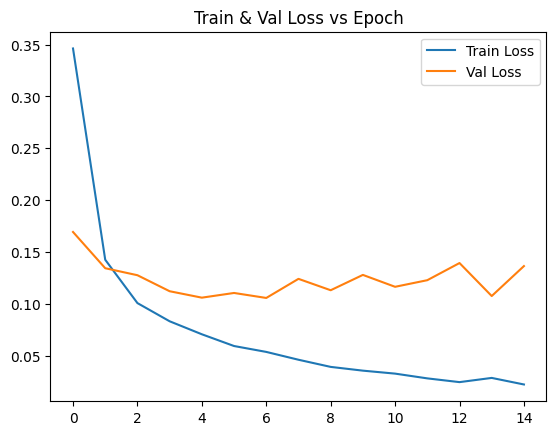

In [16]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Val Loss')
plt.title('Train & Val Loss vs Epoch')
plt.legend()
plt.show()


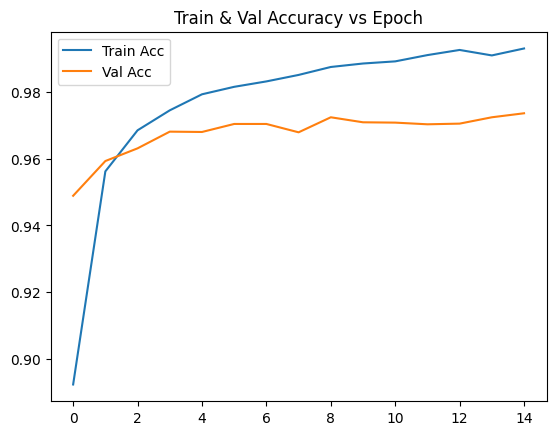

In [17]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
plt.plot(train_acc_list, label='Train Acc')
plt.plot(val_acc_list, label='Val Acc')
plt.title('Train & Val Accuracy vs Epoch')
plt.legend()
plt.show()


## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [18]:
# Leaky ReLU model definiton
# Since Model B has the best accuracy, we will use it
class ModelLeakyReLU(nn.Module):
    def __init__(self, input_size=784, hidden_size1=64, hidden_size2=128, hidden_size3=256, num_classes=10):
        super(ModelLeakyReLU, self).__init__()
        self.relu = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc1 = nn.Linear(input_size, hidden_size1)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        return self.fc4(self.relu(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))))

# Tanh model definition


class ModelTanh(nn.Module):
    def __init__(self, input_size=784, hidden_size1=64, hidden_size2=128, hidden_size3=256, num_classes=10):
        super(ModelTanh, self).__init__()
        self.relu = nn.Tanh()
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc1 = nn.Linear(input_size, hidden_size1)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        return self.fc4(self.relu(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))))


# Maintain these variable names
model_lrelu = ModelLeakyReLU().to(device)
print(model_lrelu)
model_tanh = ModelTanh().to(device)
print(model_tanh)


ModelLeakyReLU(
  (relu): LeakyReLU(negative_slope=0.01)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc1): Linear(in_features=784, out_features=64, bias=True)
)
ModelTanh(
  (relu): Tanh()
  (fc4): Linear(in_features=256, out_features=10, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc1): Linear(in_features=784, out_features=64, bias=True)
)


### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [19]:
# Training Loop for LRELU
train_acc_list = []
train_loss_list = []
val_acc_list = []
val_loss_list = []

optimizer = optim.Adam(model_lrelu.parameters(),
                       lr=learning_rate)  # use Adam optimizer

for epoch in range(num_epochs):
    # Train
    train_loss = val_loss = train_acc = val_acc = 0.0  # initialize the metrics

    # train
    model_lrelu.train()
    for _, data in enumerate(train_loader):
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        optimizer.zero_grad()  # clear the gradients
        outputs = model_lrelu(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        loss.backward()  # backward pass
        optimizer.step()  # update the weights
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # add the mini-batch training accuracy
        train_acc += (pred == labels).sum().item()
        train_loss += loss.item()  # add the mini-batch training loss

    # Validation
    model_lrelu.eval()
    for _, data in enumerate(val_loader):
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        outputs = model_lrelu(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # add the mini-batch validation accuracy
        val_acc += (pred == labels).sum().item()
        val_loss += loss.item()  # add the mini-batch validation loss

    # calculate the average training accuracy
    train_acc = train_acc/len(train_loader.dataset)
    # add the average training accuracy to the list
    train_acc_list.append(train_acc)
    # calculate the average validation accuracy
    val_acc = val_acc/len(val_loader.dataset)
    # add the average validation accuracy to the list
    val_acc_list.append(val_acc)
    # calculate the average training loss
    train_loss = train_loss/len(train_loader)
    # add the average training loss to the list
    train_loss_list.append(train_loss)
    # calculate the average validation loss
    val_loss = val_loss/len(val_loader)
    # add the average validation loss to the list
    val_loss_list.append(val_loss)

    print("Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}, Val Loss: {:.3f}, Val Acc: {:.3f}".format(
        epoch+1, train_loss, train_acc, val_loss, val_acc))


Epoch: 1, Train Loss: 0.342, Train Acc: 0.895, Val Loss: 0.174, Val Acc: 0.949
Epoch: 2, Train Loss: 0.134, Train Acc: 0.959, Val Loss: 0.152, Val Acc: 0.954
Epoch: 3, Train Loss: 0.096, Train Acc: 0.971, Val Loss: 0.120, Val Acc: 0.963
Epoch: 4, Train Loss: 0.075, Train Acc: 0.976, Val Loss: 0.112, Val Acc: 0.966
Epoch: 5, Train Loss: 0.063, Train Acc: 0.980, Val Loss: 0.122, Val Acc: 0.965
Epoch: 6, Train Loss: 0.053, Train Acc: 0.983, Val Loss: 0.112, Val Acc: 0.968
Epoch: 7, Train Loss: 0.042, Train Acc: 0.986, Val Loss: 0.132, Val Acc: 0.966
Epoch: 8, Train Loss: 0.038, Train Acc: 0.988, Val Loss: 0.111, Val Acc: 0.970
Epoch: 9, Train Loss: 0.033, Train Acc: 0.989, Val Loss: 0.120, Val Acc: 0.970
Epoch: 10, Train Loss: 0.030, Train Acc: 0.990, Val Loss: 0.112, Val Acc: 0.971
Epoch: 11, Train Loss: 0.027, Train Acc: 0.991, Val Loss: 0.127, Val Acc: 0.972
Epoch: 12, Train Loss: 0.024, Train Acc: 0.992, Val Loss: 0.118, Val Acc: 0.974
Epoch: 13, Train Loss: 0.023, Train Acc: 0.992, V

In [20]:
# Training Loop for TanH
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

optimizer = optim.Adam(model_tanh.parameters(),
                       lr=learning_rate)  # use Adam optimizer

for epoch in range(num_epochs):
    # Train
    train_loss = val_loss = train_acc = val_acc = 0.0  # initialize the metrics

    # train
    model_tanh.train()
    for _, data in enumerate(train_loader):
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        optimizer.zero_grad()  # clear the gradients
        outputs = model_tanh(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        loss.backward()  # backward pass
        optimizer.step()  # update the weights
        train_loss += loss.item()  # add the mini-batch training loss
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # add the mini-batch training accuracy
        train_acc += (pred == labels).sum().item()

    # Validation
    model_tanh.eval()  # set the model to evaluation mode
    for _, data in enumerate(val_loader):
        inputs, labels = data  # get the inputs
        inputs, labels = inputs.to(device), labels.to(
            device)  # move to device, e.g. GPU
        outputs = model_tanh(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        val_loss += loss.item()  # add the mini-batch validation loss
        # get the index of the max log-probability
        _, pred = torch.max(outputs, 1)
        # add the mini-batch validation accuracy
        val_acc += (pred == labels).sum().item()

    # calculate the average training accuracy
    train_acc = train_acc/len(train_loader.dataset)
    # add the average training accuracy to the list
    train_acc_list.append(train_acc)
    # calculate the average validation accuracy
    val_acc = val_acc/len(val_loader.dataset)
    # add the average validation accuracy to the list
    val_acc_list.append(val_acc)
    # calculate the average training loss
    train_loss = train_loss/len(train_loader)
    # add the average training loss to the list
    train_loss_list.append(train_loss)
    # calculate the average validation loss
    val_loss = val_loss/len(val_loader)
    # add the average validation loss to the list
    val_loss_list.append(val_loss)

    print("Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}, Val Loss: {:.3f}, Val Acc: {:.3f}".format(
        epoch+1, train_loss, train_acc, val_loss, val_acc))


Epoch: 1, Train Loss: 0.348, Train Acc: 0.893, Val Loss: 0.217, Val Acc: 0.936
Epoch: 2, Train Loss: 0.162, Train Acc: 0.951, Val Loss: 0.164, Val Acc: 0.950
Epoch: 3, Train Loss: 0.114, Train Acc: 0.965, Val Loss: 0.134, Val Acc: 0.959
Epoch: 4, Train Loss: 0.090, Train Acc: 0.972, Val Loss: 0.125, Val Acc: 0.961
Epoch: 5, Train Loss: 0.073, Train Acc: 0.977, Val Loss: 0.128, Val Acc: 0.962
Epoch: 6, Train Loss: 0.060, Train Acc: 0.980, Val Loss: 0.115, Val Acc: 0.966
Epoch: 7, Train Loss: 0.049, Train Acc: 0.985, Val Loss: 0.119, Val Acc: 0.968
Epoch: 8, Train Loss: 0.042, Train Acc: 0.986, Val Loss: 0.111, Val Acc: 0.969
Epoch: 9, Train Loss: 0.036, Train Acc: 0.988, Val Loss: 0.120, Val Acc: 0.970
Epoch: 10, Train Loss: 0.030, Train Acc: 0.990, Val Loss: 0.117, Val Acc: 0.968
Epoch: 11, Train Loss: 0.025, Train Acc: 0.992, Val Loss: 0.132, Val Acc: 0.968
Epoch: 12, Train Loss: 0.022, Train Acc: 0.993, Val Loss: 0.128, Val Acc: 0.969
Epoch: 13, Train Loss: 0.023, Train Acc: 0.992, V

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [21]:
# Define how to calculate Accuracy on Test Set
def test_accuracy(model, test_loader):
    model.eval()  # set the model to evaluation mode
    test_running_correct = 0  # initialize the number of correct predictions
    with torch.no_grad():  # do not calculate the gradients
        for data in test_loader:  # iterate over the test set
            inputs, labels = data  # get the inputs
            inputs, labels = inputs.to(device), labels.to(
                device)  # move to device, e.g. GPU
            outputs = model(inputs)  # forward pass
            # get the index of the max log-probability
            _, preds = torch.max(outputs.data, 1)
            # add the mini-batch test accuracy
            test_running_correct += (preds == labels).sum().item()
    test_accuracy = 100. * test_running_correct / \
        len(test_loader.dataset)  # calculate the test accuracy
    return test_accuracy


In [22]:
# Accuracy of RELU model
# since modelB is the best model, we will use it to calculate the test accuracy of RELU model
print("Test Accuracy of RELU model: {:.3f}".format(
    test_accuracy(modelB, test_loader)))


Test Accuracy of RELU model: 97.560


In [23]:
# Accuracy of TanH model
print("Test Accuracy of RELU model: {:.3f}".format(
    test_accuracy(model_tanh, test_loader)))


Test Accuracy of RELU model: 96.800


In [24]:
# Accuracy of LeakyReLU model
print("Test Accuracy of RELU model: {:.3f}".format(
    test_accuracy(model_lrelu, test_loader)))


Test Accuracy of RELU model: 97.190


Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `97.560` %
* TanH model Test Set Accuracy: `96.800` %
* LeakReLU model Test Set Accuracy: `97.190` %